# Most Streamed Spotify Songs 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)


In [3]:
df = pd.read_csv("spotify-2023.csv", encoding='latin1')

In [4]:
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
662,Notion,The Rare Occasions,1,2016,8,5,2393,0,421135627,22,13,65,0,6,160,A,Major,31,30,88,7,0,8,8
463,Ghost in the Machine (feat. Phoebe Bridgers),"SZA, Phoebe Bridgers",2,2022,12,9,1634,0,110073250,16,20,4,0,0,125,F#,Major,62,59,43,84,3,11,5
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33
700,Una Noche en Medellï¿½,Cris Mj,1,2022,1,21,5415,32,682475162,46,16,53,1,2,96,A#,Minor,87,82,53,10,0,5,8
917,Poland,Lil Yachty,1,2022,6,23,1584,0,115331792,38,0,24,0,0,150,F,Minor,70,26,56,14,83,11,5


| Alan                  | Açıklama                                                                 |
|-----------------------|--------------------------------------------------------------------------|
| `track_name`          | Şarkının adı                                                             |
| `artist(s)_name`      | Sanatçının adı veya sanatçıların isimleri (birden fazla sanatçı varsa)  |
| `artist_count`        | Sanatçı sayısı                                                           |
| `released_year`       | Şarkının yayınlandığı yıl                                                |
| `released_month`      | Şarkının yayınlandığı ay                                                 |
| `released_day`        | Şarkının yayınlandığı gün                                                |
| `in_spotify_playlists`| Spotify'da kaç listede yer aldığı                                         |
| `in_spotify_charts`   | Spotify listelerinde kaçıncı sırada olduğu                               |
| `streams`             | Şarkının toplam dinlenme sayısı                                          |
| `in_apple_playlists`  | Apple Music'te kaç listede yer aldığı                                     |
| `in_apple_charts`     | Apple Music listelerinde kaçıncı sırada olduğu                           |
| `in_deezer_playlists` | Deezer'da kaç listede yer aldığı                                          |
| `in_deezer_charts`    | Deezer listelerinde kaçıncı sırada olduğu                                 |
| `in_shazam_charts`    | Shazam listelerinde kaçıncı sırada olduğu                                 |
| `bpm`                 | Şarkının dakikadaki vuruş sayısı (Beats Per Minute)                    |
| `key`                 | Şarkının ton anahtarı (örneğin, C, D, G)                                 |
| `mode`                | Şarkının mod durumu (Major veya Minor)                                   |
| `danceability_%`      | Şarkının dans edilebilirlik yüzdesi                                     |
| `valence_%`           | Şarkının pozitif duygusal etkisi yüzdesi                                 |
| `energy_%`            | Şarkının enerjik olma yüzdesi                                           |
| `acousticness_%`      | Şarkının akustik olma yüzdesi                                           |
| `instrumentalness_%`  | Şarkının enstrümantallik yüzdesi                                        |
| `liveness_%`          | Şarkının canlılık yüzdesi                                               |
| `speechiness_%`       | Şarkıda konuşma yoğunluğu yüzdesi                                       |

In [6]:
df.shape

(953, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
df['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [10]:
df['in_deezer_playlists'].unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

In [11]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [12]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [13]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [14]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [15]:
# 'in_shazam_charts' sütunundaki boş değerleri 'in_apple_charts' ile doldur
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(df['in_apple_charts'])

In [16]:
df['key'] = df['key'].fillna(' ')

In [17]:
df['toplam_listelerde'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']

In [18]:
df = pd.get_dummies(df, columns=['key', 'mode'])

In [19]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
toplam_listelerde       float64
key_                       bool
key_A                      bool
key_A#                     bool
key_B                      bool
key_C#                     bool
key_D                      bool
key_D#                     bool
key_E                      bool
key_F   

In [20]:
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,toplam_listelerde,key_,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.0,300,215,745.0,58,215.0,118,71,65,68,6,0,3,7,13256.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False
431,Evergreen (You Didnï¿½ï¿½ï¿½t Deserve Me A,Omar Apollo,1,2022,4,8,2499,0,227918678.0,70,0,49.0,0,0.0,82,70,31,34,60,1,11,4,2618.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
517,I Heard You're Married (feat. Lil Wayne),"The Weeknd, Lil Wayne",2,2022,1,7,1178,0,91656026.0,9,10,9.0,0,0.0,110,75,85,84,10,0,31,19,1196.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812.0,1,50,19.0,0,19.0,139,48,37,41,32,0,10,10,1808.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451.0,26,124,15.0,1,22.0,127,80,74,77,36,0,11,4,1824.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
top_streams = df.sort_values(by='streams', ascending=False).head(20)

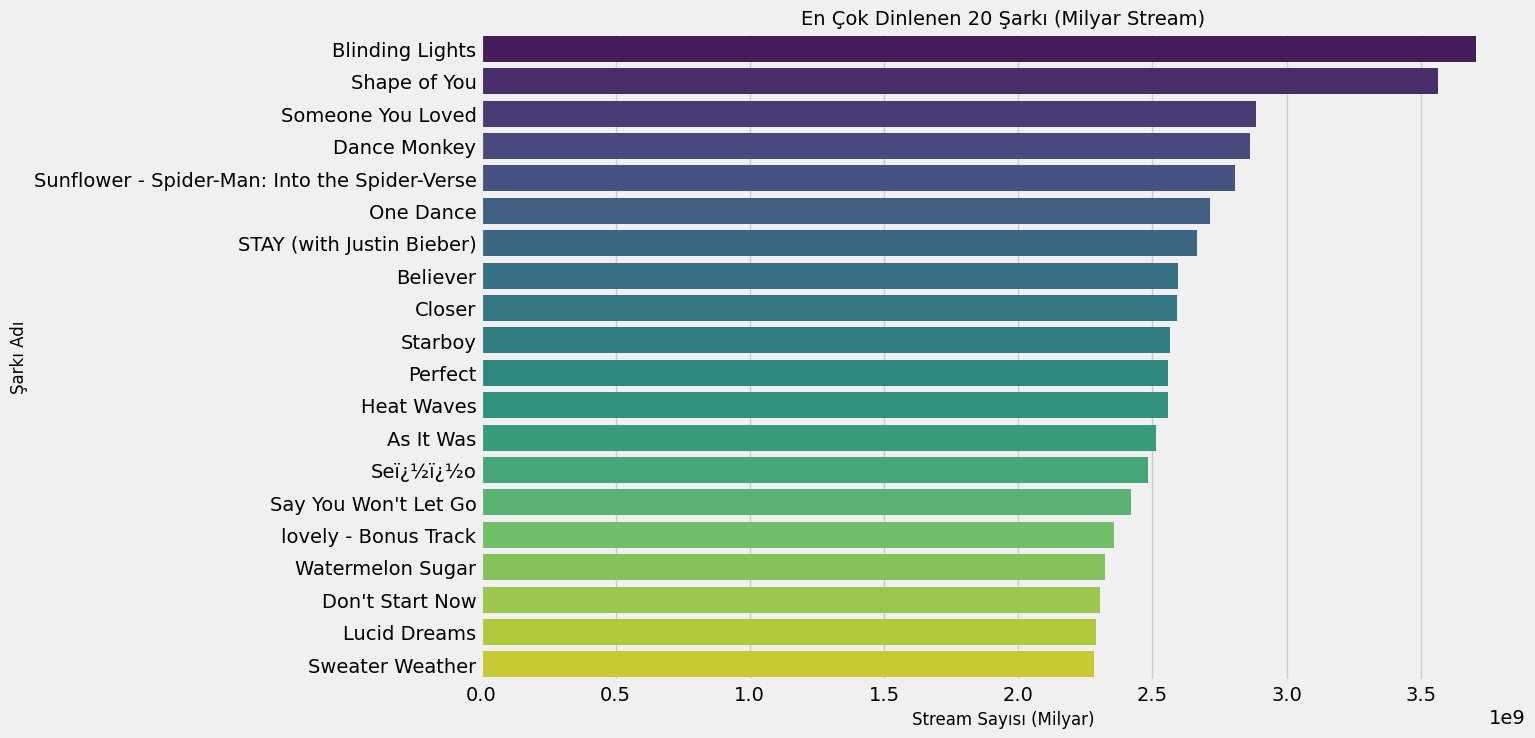

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='streams', y='track_name', data=top_streams, palette='viridis')
plt.title('En Çok Dinlenen 20 Şarkı (Milyar Stream)', fontsize=14)
plt.xlabel('Stream Sayısı (Milyar)', fontsize=12)
plt.ylabel('Şarkı Adı', fontsize=12);

In [24]:
top_playlists = df.sort_values(by='toplam_listelerde', ascending=False).head(20)

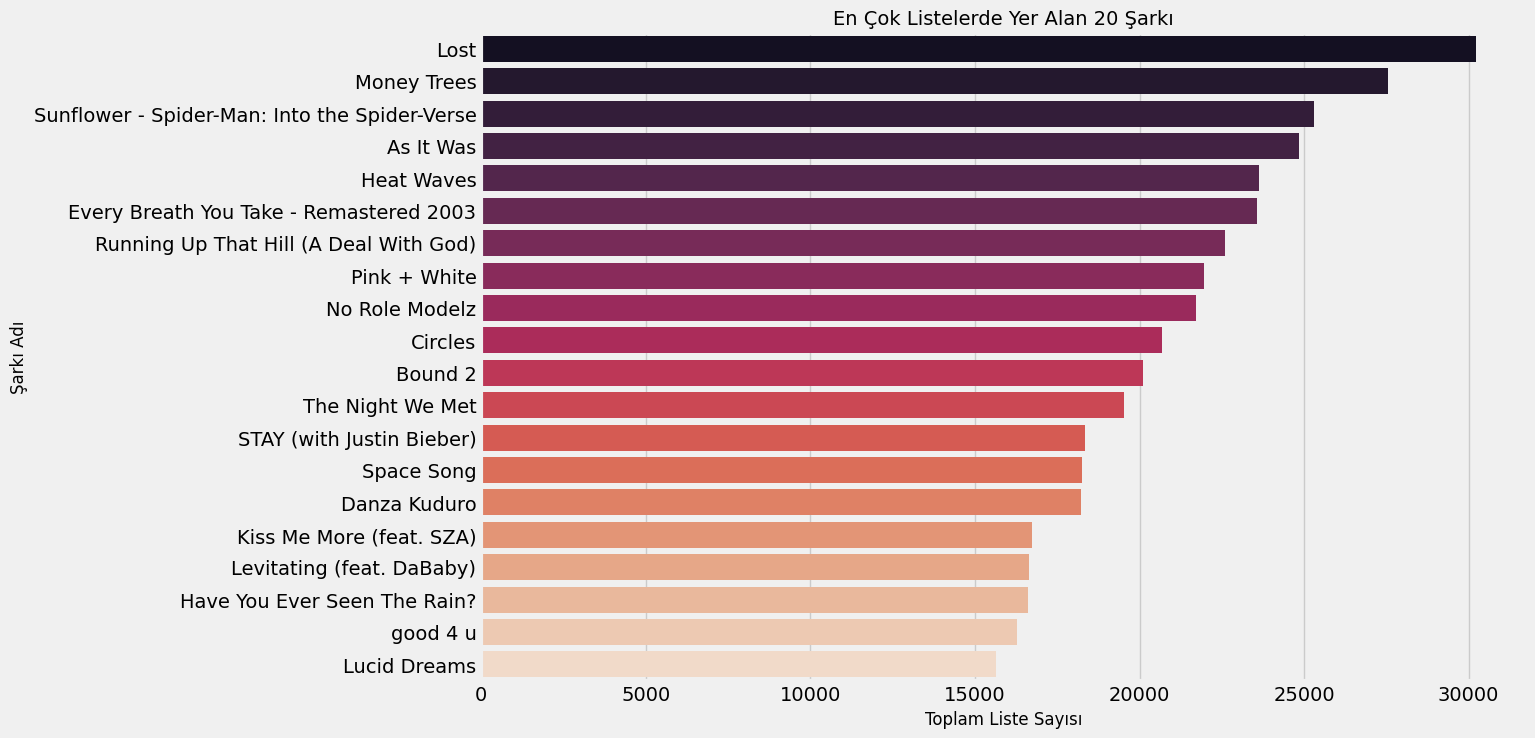

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='toplam_listelerde', y='track_name', data=top_playlists, palette='rocket')
plt.title('En Çok Listelerde Yer Alan 20 Şarkı', fontsize=14)
plt.xlabel('Toplam Liste Sayısı', fontsize=12)
plt.ylabel('Şarkı Adı', fontsize=12);

In [26]:
top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(20).reset_index()

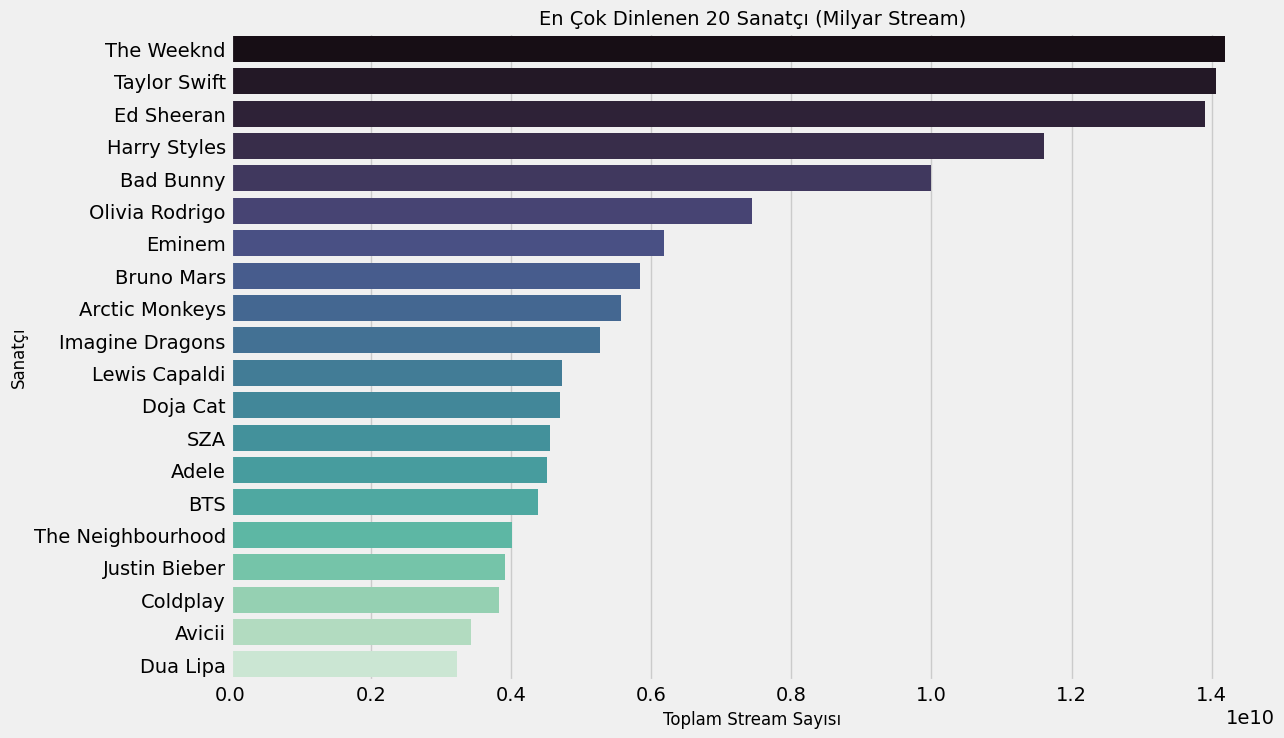

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='streams', y='artist(s)_name', data=top_artists, palette='mako')
plt.title('En Çok Dinlenen 20 Sanatçı (Milyar Stream)', fontsize=14)
plt.xlabel('Toplam Stream Sayısı', fontsize=12)
plt.ylabel('Sanatçı', fontsize=12);

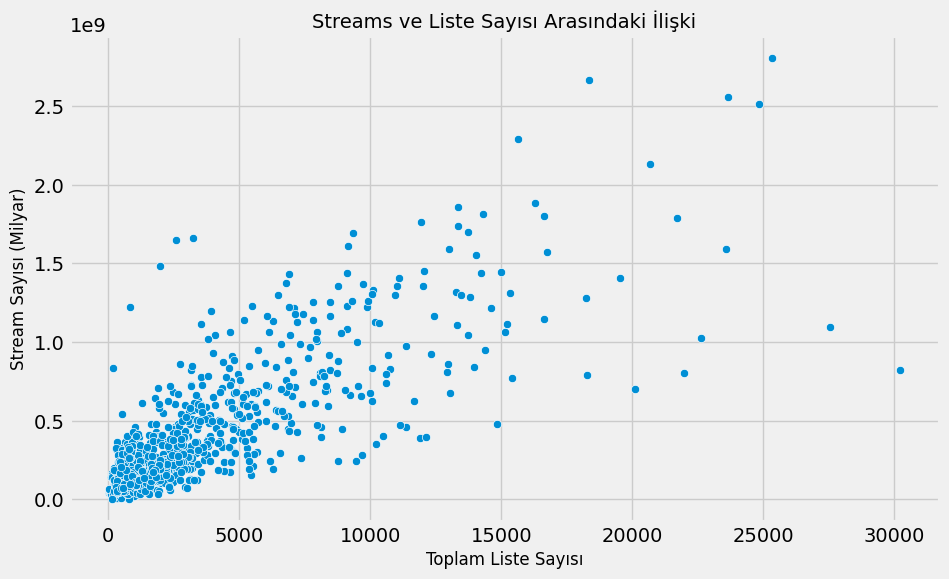

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='toplam_listelerde', y='streams', data=df)
plt.title('Streams ve Liste Sayısı Arasındaki İlişki', fontsize=14)
plt.xlabel('Toplam Liste Sayısı', fontsize=12)
plt.ylabel('Stream Sayısı (Milyar)', fontsize=12)
plt.show()

In [29]:
# Örnek: Enerji ve dans edilebilirlik ortalamaları
artist_features = df.groupby('artist(s)_name')[['energy_%', 'danceability_%']].mean().nlargest(20, 'energy_%')

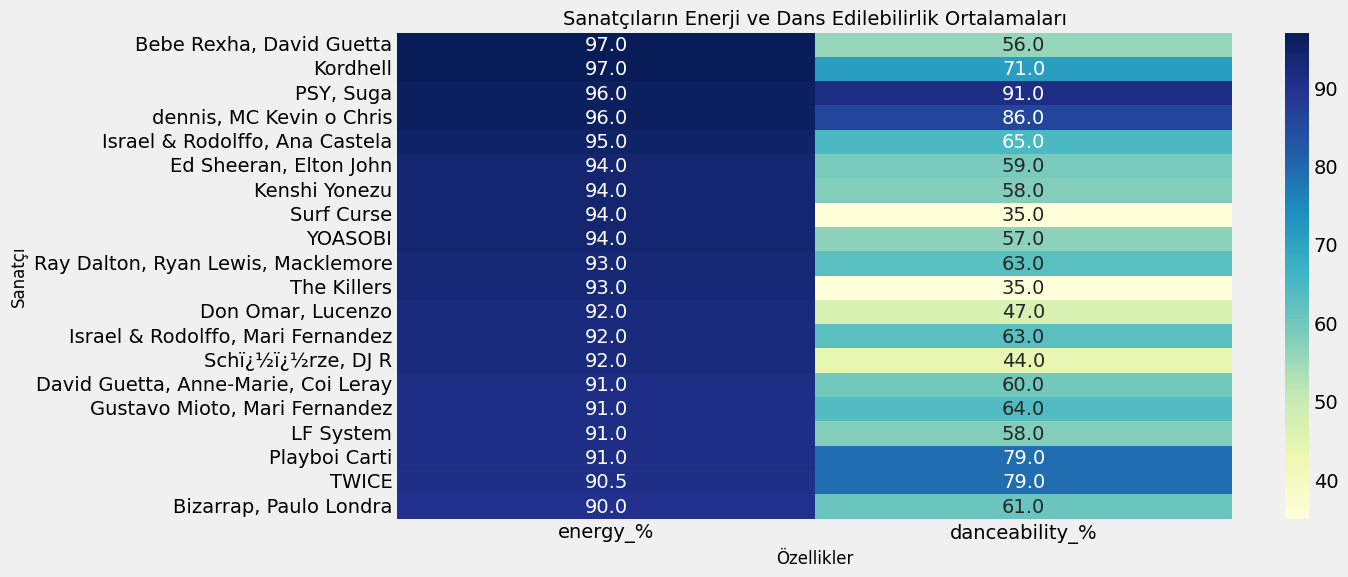

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(artist_features, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Sanatçıların Enerji ve Dans Edilebilirlik Ortalamaları', fontsize=14)
plt.xlabel('Özellikler', fontsize=12)
plt.ylabel('Sanatçı', fontsize=12);

In [31]:
artist_features = df.groupby('artist(s)_name')[['acousticness_%', 'instrumentalness_%']].mean()

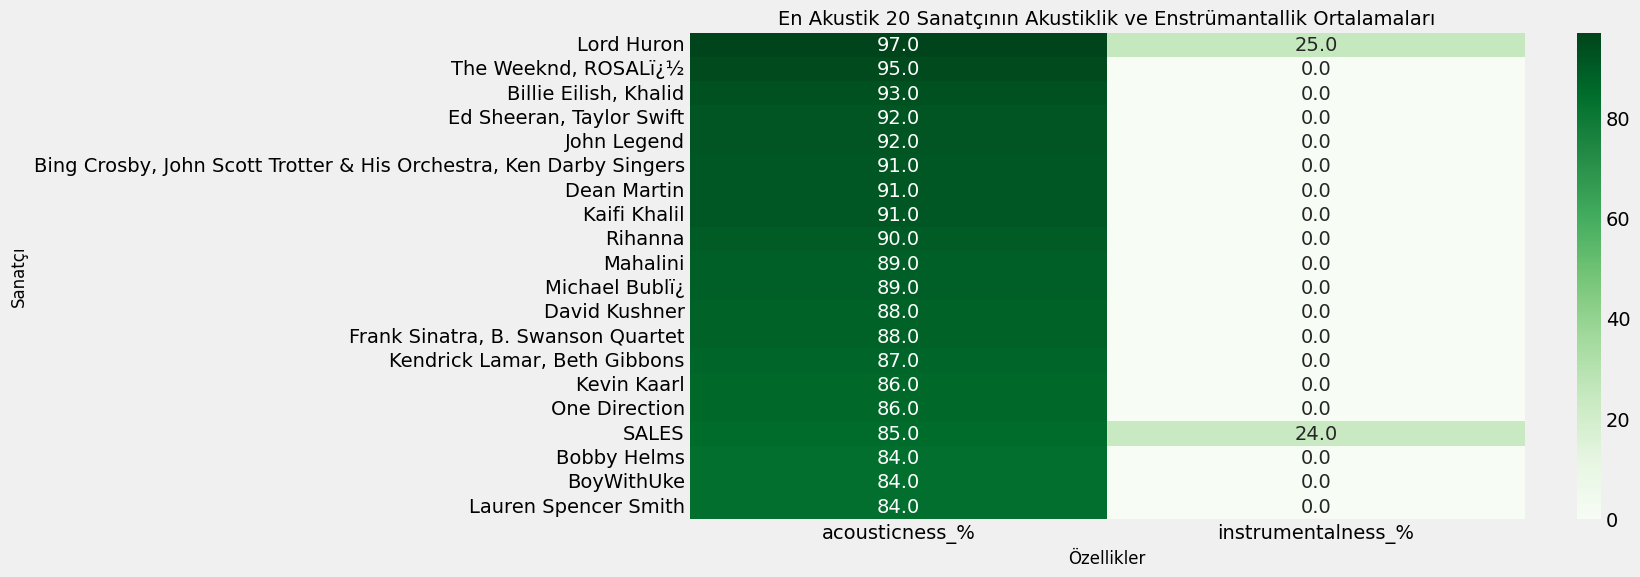

In [32]:
top_acoustic = artist_features.nlargest(20, 'acousticness_%')

# Heatmap ile görselleştir
plt.figure(figsize=(12, 6))
sns.heatmap(top_acoustic, annot=True, cmap='Greens', fmt='.1f')
plt.title('En Akustik 20 Sanatçının Akustiklik ve Enstrümantallik Ortalamaları', fontsize=14)
plt.xlabel('Özellikler', fontsize=12)
plt.ylabel('Sanatçı', fontsize=12);

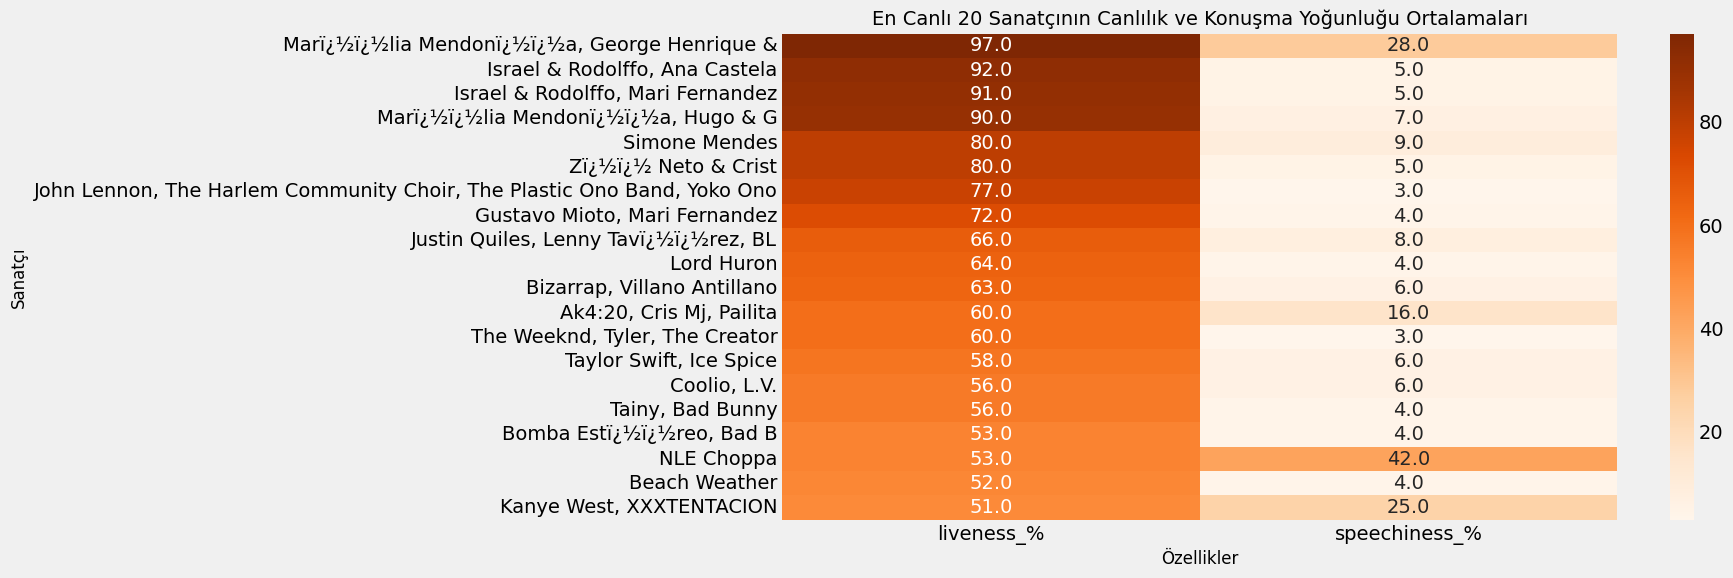

In [33]:
# Canlılık ve konuşma yoğunluğu ortalamalarını hesapla
artist_features = df.groupby('artist(s)_name')[['liveness_%', 'speechiness_%']].mean()

# En yüksek canlılığa sahip 10 sanatçıyı seç
top_liveness = artist_features.nlargest(20, 'liveness_%')

# Heatmap ile görselleştir
plt.figure(figsize=(12, 6))
sns.heatmap(top_liveness, annot=True, cmap='Oranges', fmt='.1f')
plt.title('En Canlı 20 Sanatçının Canlılık ve Konuşma Yoğunluğu Ortalamaları', fontsize=14)
plt.xlabel('Özellikler', fontsize=12)
plt.ylabel('Sanatçı', fontsize=12)
plt.show()


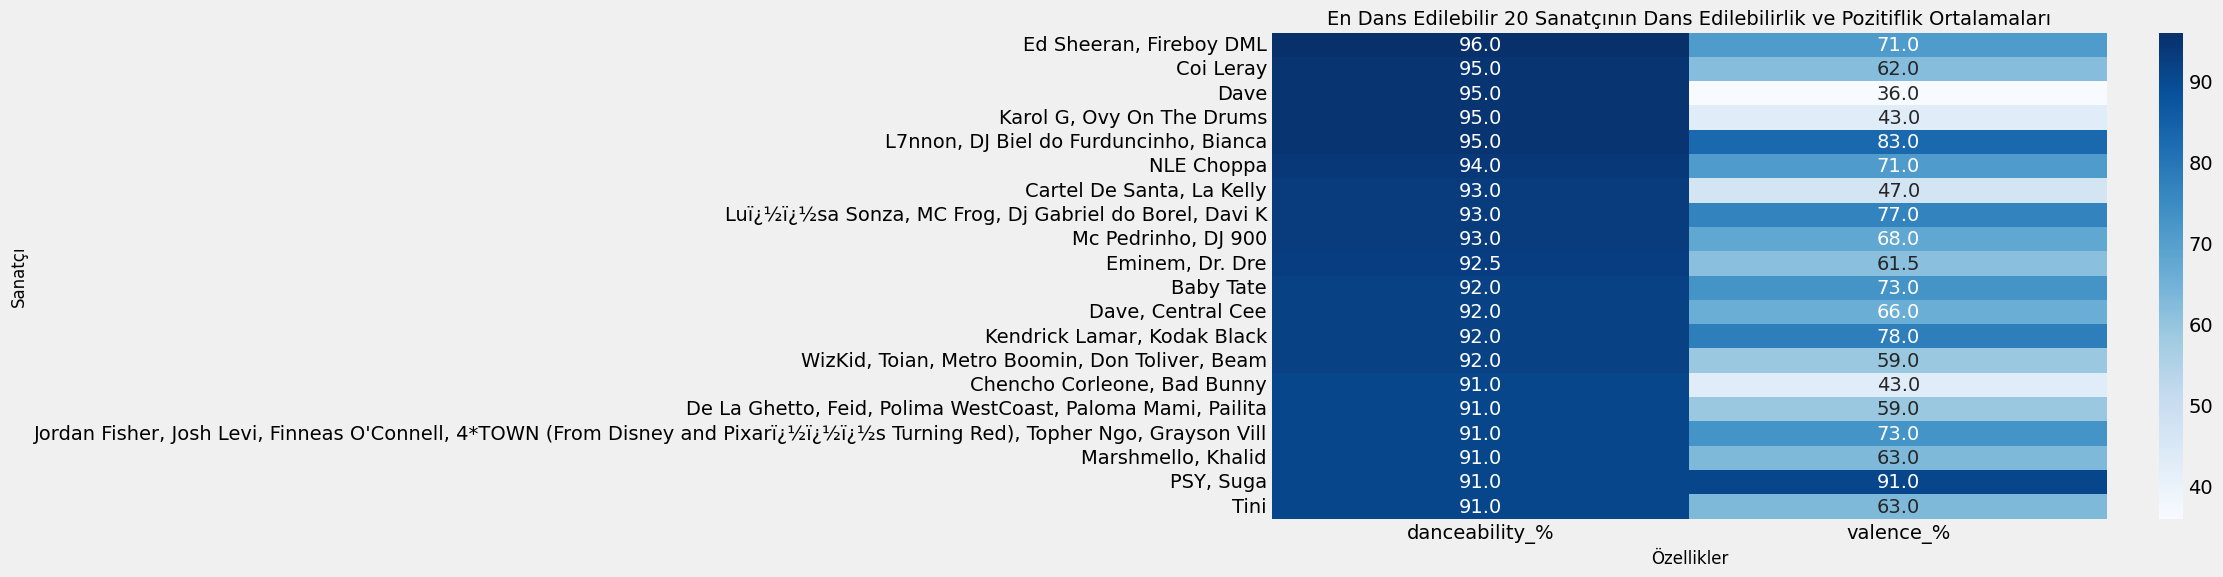

In [34]:
# Dans edilebilirlik ve pozitiflik ortalamalarını hesapla
artist_features = df.groupby('artist(s)_name')[['danceability_%', 'valence_%']].mean()

# En yüksek dans edilebilirliğe sahip 10 sanatçıyı seç
top_danceability = artist_features.nlargest(20, 'danceability_%')

# Heatmap ile görselleştir
plt.figure(figsize=(12, 6))
sns.heatmap(top_danceability, annot=True, cmap='Blues', fmt='.1f')
plt.title('En Dans Edilebilir 20 Sanatçının Dans Edilebilirlik ve Pozitiflik Ortalamaları', fontsize=14)
plt.xlabel('Özellikler', fontsize=12)
plt.ylabel('Sanatçı', fontsize=12)
plt.show()


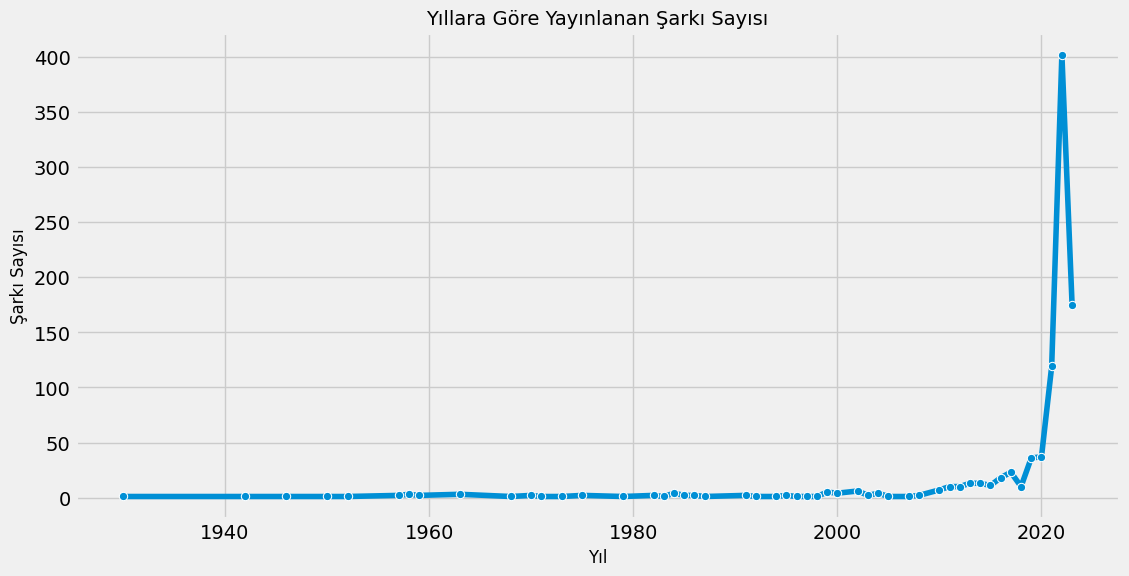

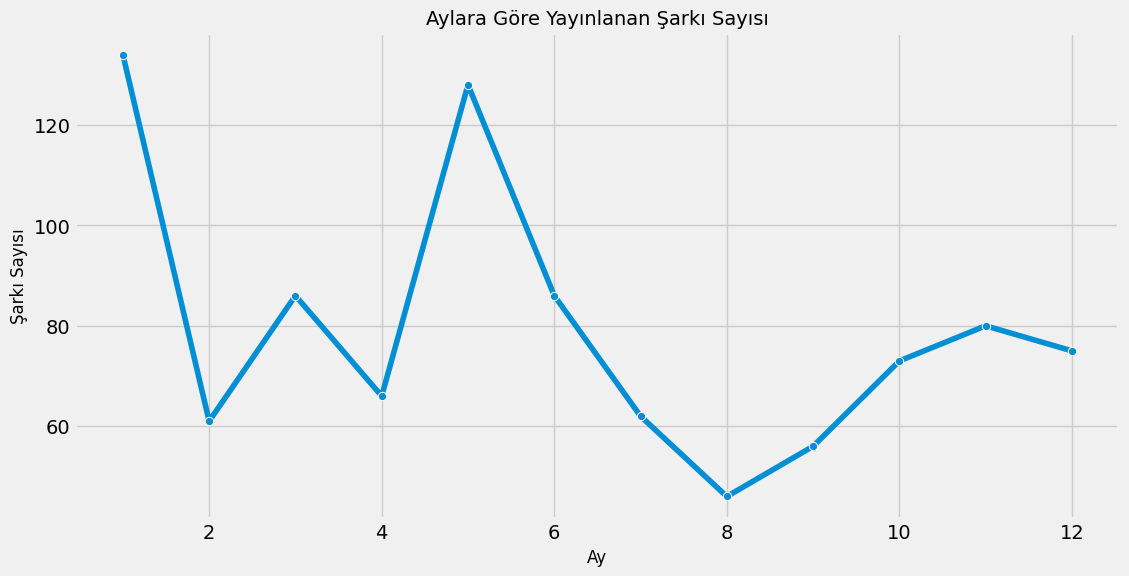

In [35]:
# Yıllara göre şarkı sayılarını hesapla
yearly_counts = df['released_year'].value_counts().sort_index()

# Yıllara göre şarkı sayılarını görselleştir
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Yıllara Göre Yayınlanan Şarkı Sayısı', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Şarkı Sayısı', fontsize=12)
plt.show()

# Aylara göre şarkı sayılarını hesapla
monthly_counts = df['released_month'].value_counts().sort_index()

# Aylara göre şarkı sayılarını görselleştir
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Aylara Göre Yayınlanan Şarkı Sayısı', fontsize=14)
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Şarkı Sayısı', fontsize=12)
plt.show()

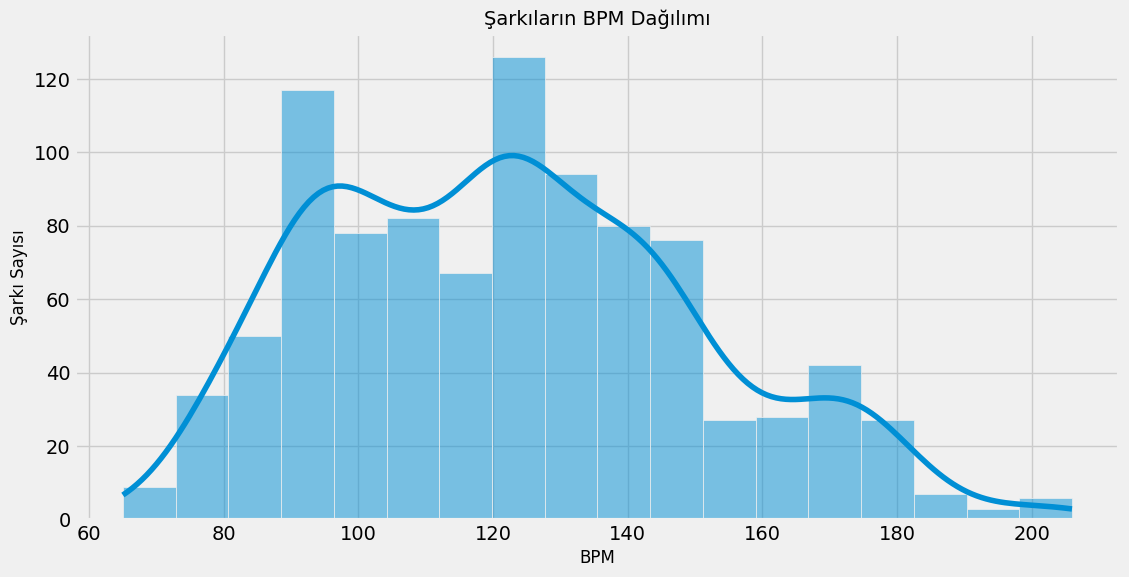

In [36]:
# BPM dağılımını görselleştir
plt.figure(figsize=(12, 6))
sns.histplot(df['bpm'], kde=True)
plt.title('Şarkıların BPM Dağılımı', fontsize=14)
plt.xlabel('BPM', fontsize=12)
plt.ylabel('Şarkı Sayısı', fontsize=12)
plt.show()


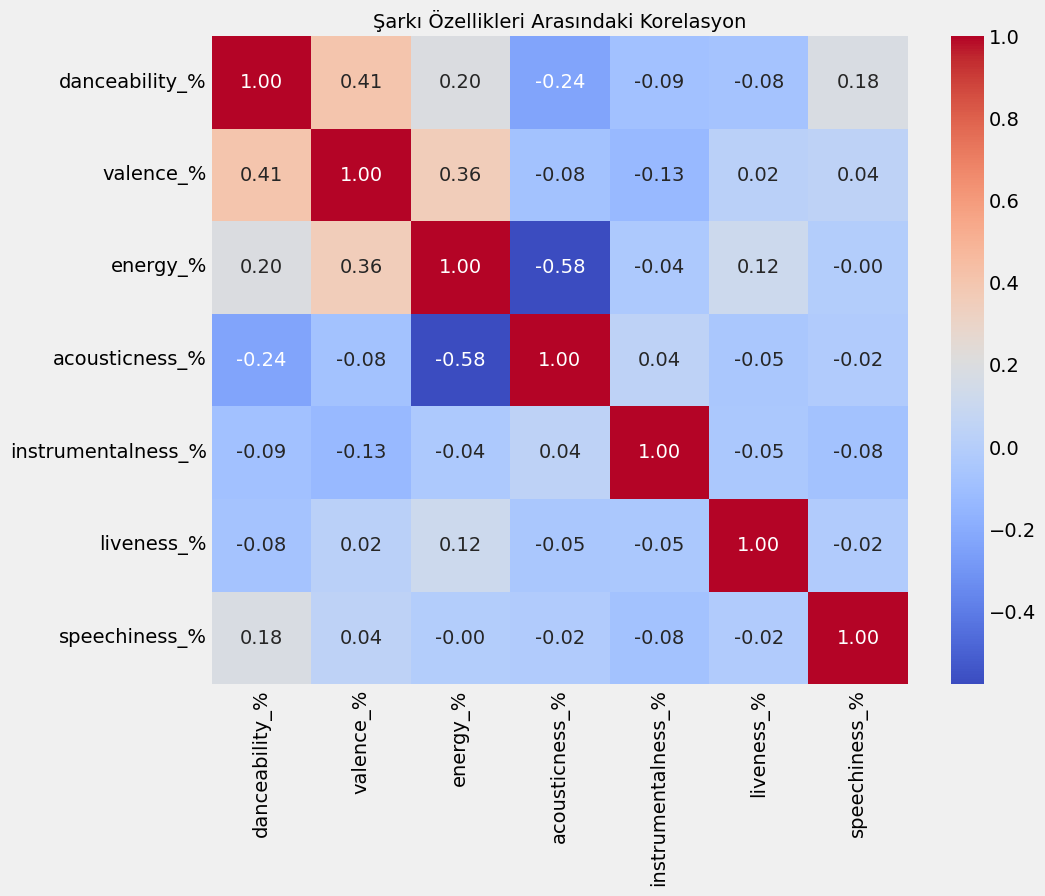

In [37]:
# Korelasyon matrisini hesapla
corr_matrix = df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

# Korelasyon matrisini heatmap ile görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Şarkı Özellikleri Arasındaki Korelasyon', fontsize=14)
plt.show()


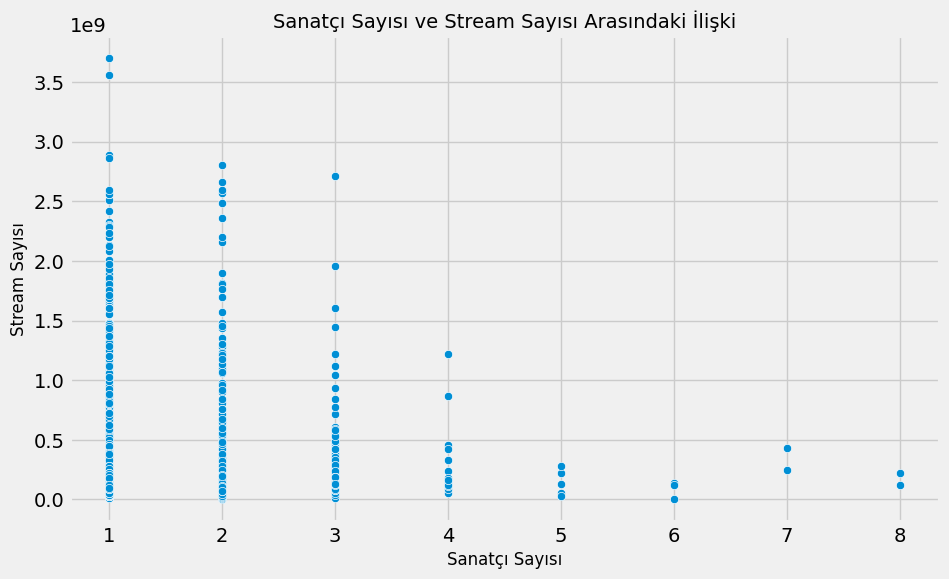

In [38]:
# Sanatçı sayısı ve stream sayısı arasındaki ilişkiyi incele
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=df)
plt.title('Sanatçı Sayısı ve Stream Sayısı Arasındaki İlişki', fontsize=14)
plt.xlabel('Sanatçı Sayısı', fontsize=12)
plt.ylabel('Stream Sayısı', fontsize=12)
plt.show()


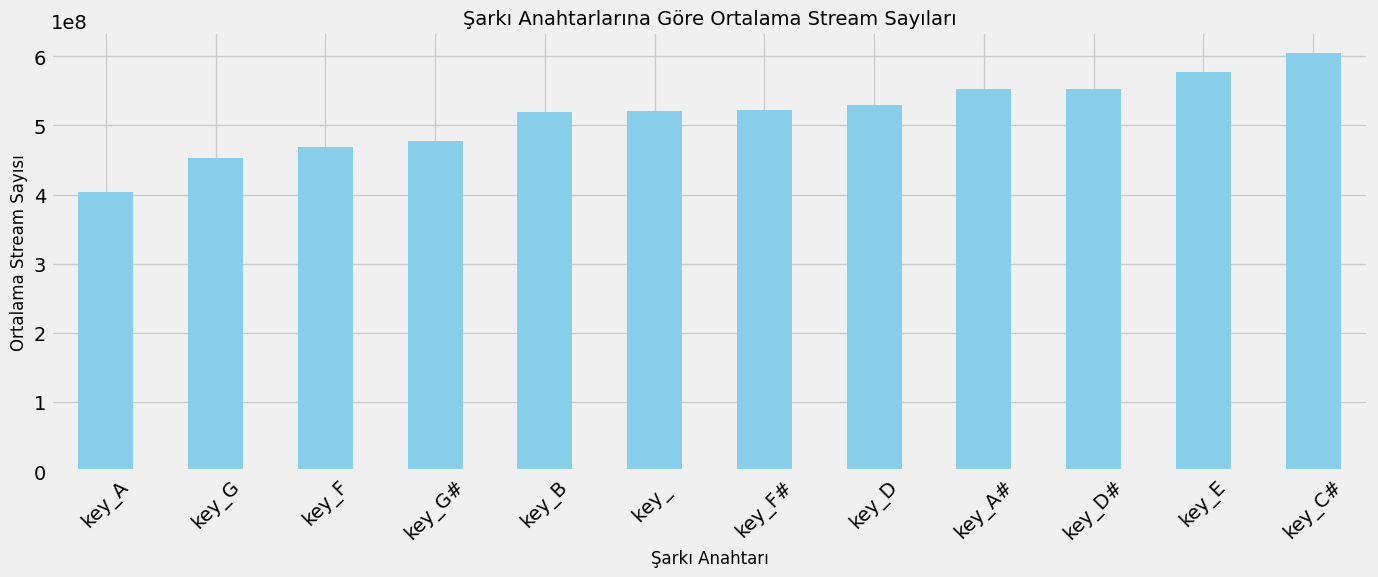

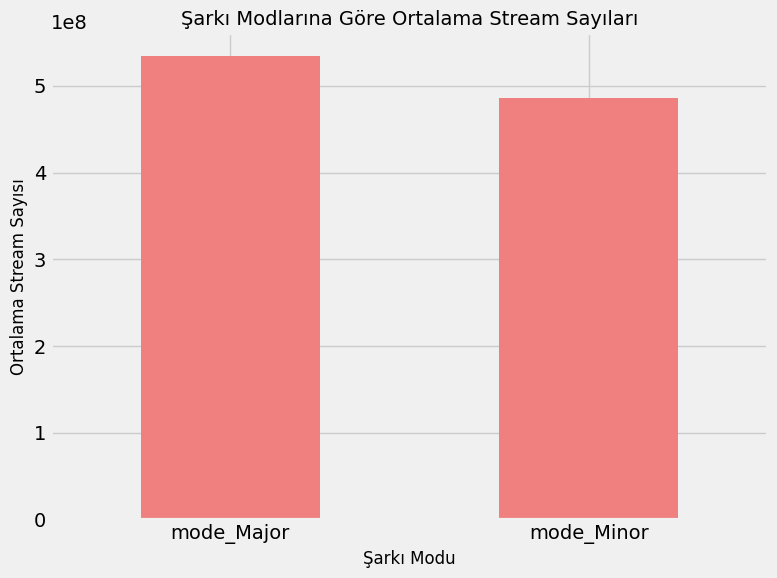

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'key' sütunları için ortalama stream değerlerini hesaplayalım
key_columns = [col for col in df.columns if col.startswith('key_')]
key_streams = df[key_columns].mul(df['streams'], axis=0).sum() / df[key_columns].sum()

# 'key' sütunlarının ortalama stream değerlerini görselleştirelim
plt.figure(figsize=(14, 6))
key_streams.sort_values().plot(kind='bar', color='skyblue')
plt.title('Şarkı Anahtarlarına Göre Ortalama Stream Sayıları', fontsize=14)
plt.xlabel('Şarkı Anahtarı', fontsize=12)
plt.ylabel('Ortalama Stream Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 'mode' sütunları için ortalama stream değerlerini hesaplayalım
mode_columns = [col for col in df.columns if col.startswith('mode_')]
mode_streams = df[mode_columns].mul(df['streams'], axis=0).sum() / df[mode_columns].sum()

# 'mode' sütunlarının ortalama stream değerlerini görselleştirelim
plt.figure(figsize=(8, 6))
mode_streams.plot(kind='bar', color='lightcoral')
plt.title('Şarkı Modlarına Göre Ortalama Stream Sayıları', fontsize=14)
plt.xlabel('Şarkı Modu', fontsize=12)
plt.ylabel('Ortalama Stream Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


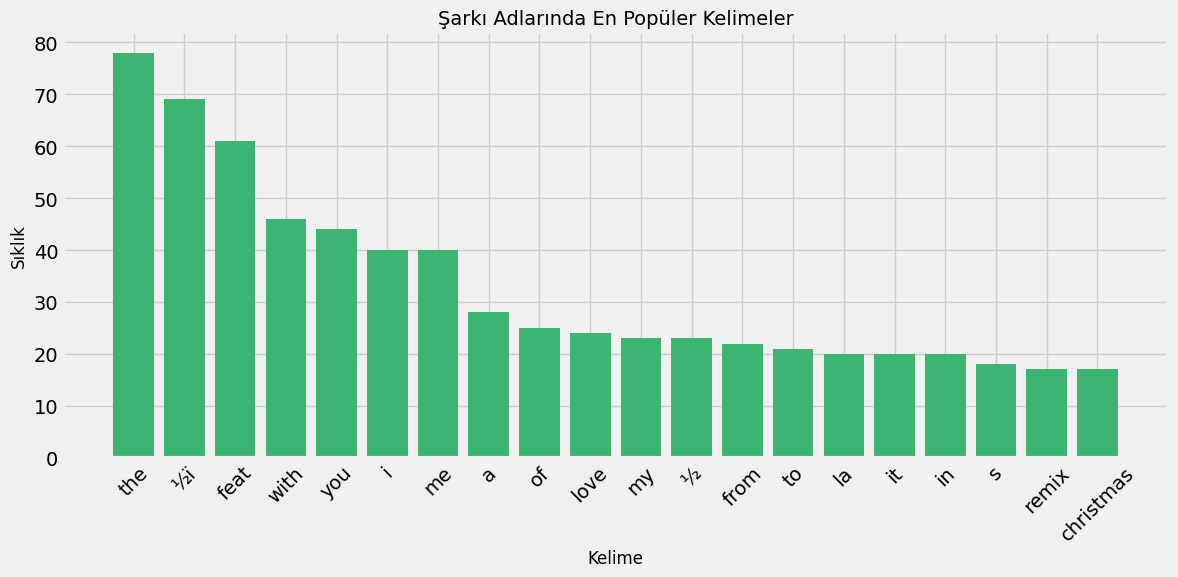

In [40]:
from collections import Counter
import re

# Şarkı adlarını al ve küçük harfe çevir
song_names = df['track_name'].str.lower().tolist()

# Kelimeleri ayır
words = []
for name in song_names:
    words.extend(re.findall(r'\b\w+\b', name))

# Kelime sıklıklarını hesapla
word_counts = Counter(words)

# En popüler 20 kelimeyi al
most_common_words = word_counts.most_common(20)

# En popüler kelimeleri görselleştir
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words], color='mediumseagreen')
plt.title('Şarkı Adlarında En Popüler Kelimeler', fontsize=14)
plt.xlabel('Kelime', fontsize=12)
plt.ylabel('Sıklık', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


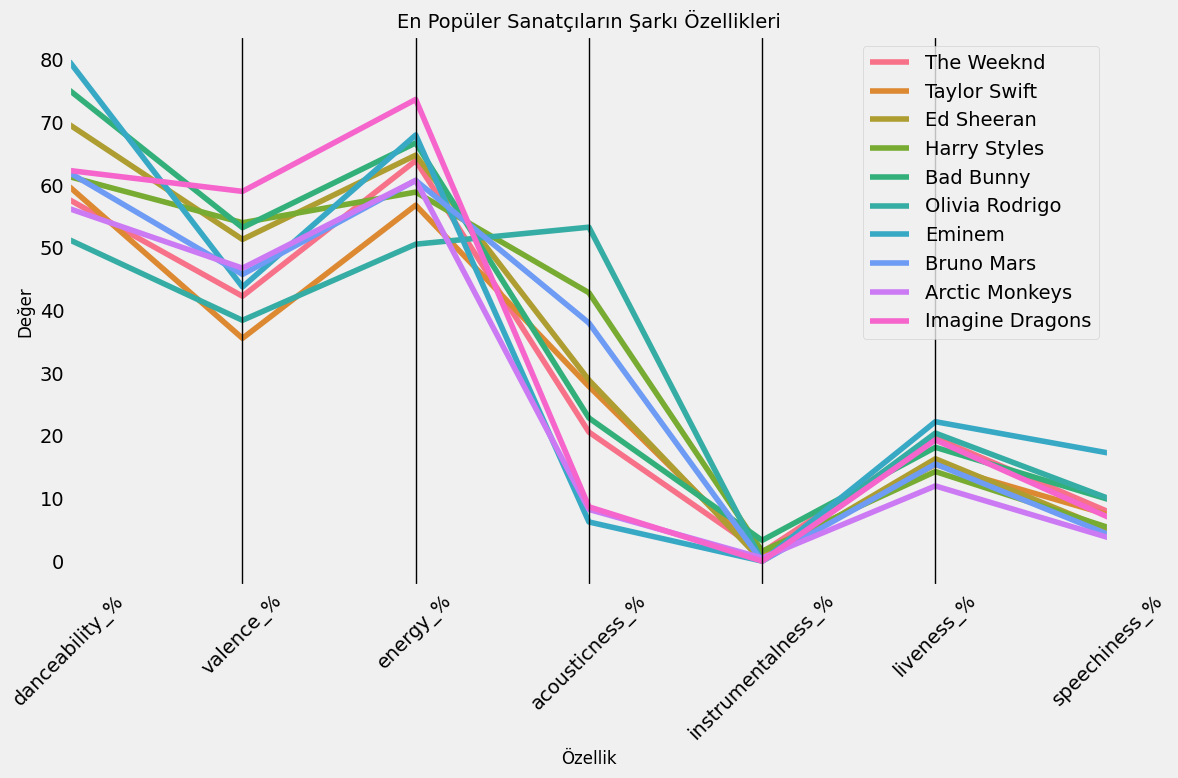

In [41]:
# Sanatçıların ortalama özelliklerini hesapla
artist_features = df.groupby('artist(s)_name')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

# En çok dinlenen 10 sanatçıyı seç
top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(10).index

# En çok dinlenen 10 sanatçının özelliklerini al
top_artist_features = artist_features.loc[top_artists]

# Paralel koordinat grafiği ile görselleştir
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 8))
parallel_coordinates(top_artist_features.reset_index(), class_column='artist(s)_name', color=sns.color_palette("husl", len(top_artists)))
plt.title('En Popüler Sanatçıların Şarkı Özellikleri', fontsize=14)
plt.xlabel('Özellik', fontsize=12)
plt.ylabel('Değer', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


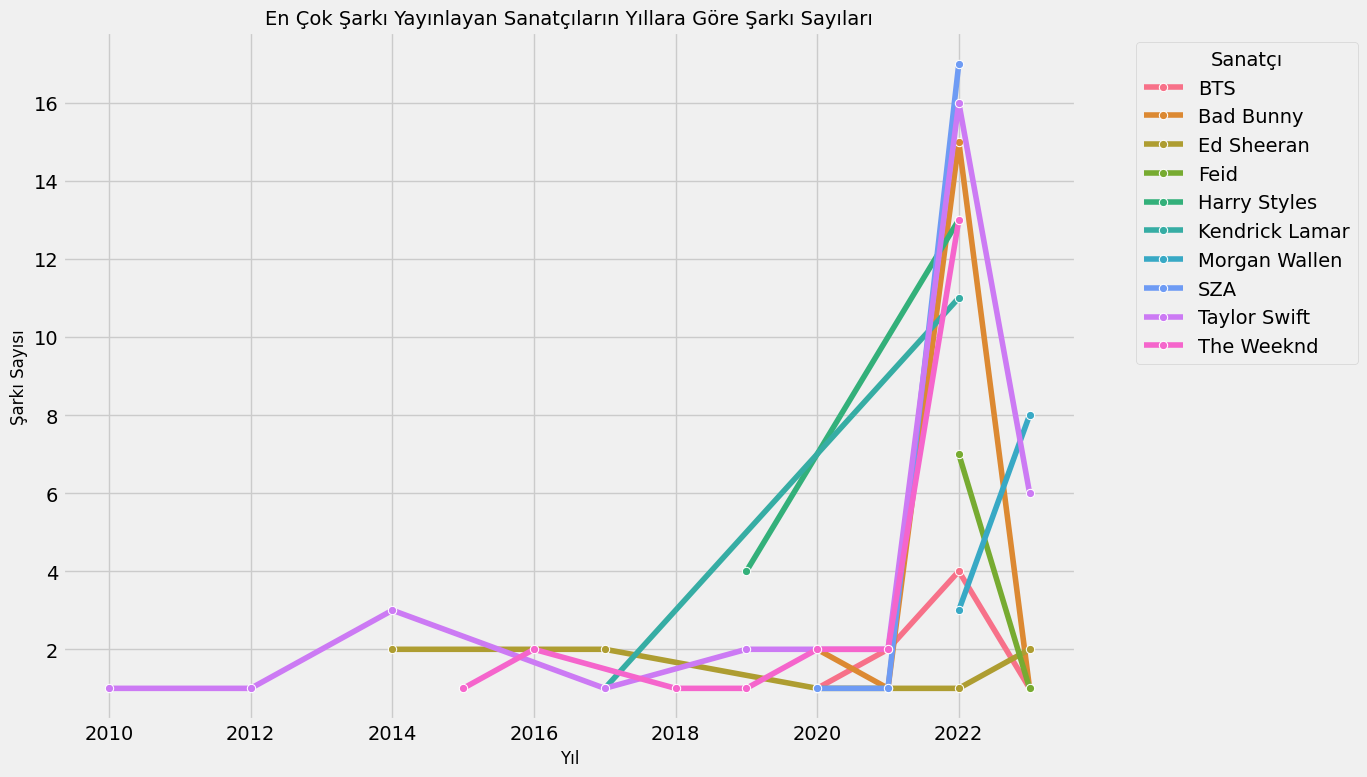

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle ve temizle (önceki adımları buraya ekleyin)
# ...

# Sanatçıların şarkı yayınlama sayılarını hesapla
artist_yearly_counts = df.groupby(['artist(s)_name', 'released_year']).size().reset_index(name='song_count')

# En çok şarkı yayınlayan 10 sanatçıyı seç
top_artists = df['artist(s)_name'].value_counts().nlargest(10).index

# En çok şarkı yayınlayan sanatçıların yıllara göre şarkı sayılarını filtrele
top_artist_yearly_counts = artist_yearly_counts[artist_yearly_counts['artist(s)_name'].isin(top_artists)]

# Yıllara göre şarkı sayılarını görselleştir
plt.figure(figsize=(14, 8))
sns.lineplot(x='released_year', y='song_count', hue='artist(s)_name', data=top_artist_yearly_counts, marker='o')
plt.title('En Çok Şarkı Yayınlayan Sanatçıların Yıllara Göre Şarkı Sayıları', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Şarkı Sayısı', fontsize=12)
plt.legend(title='Sanatçı', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


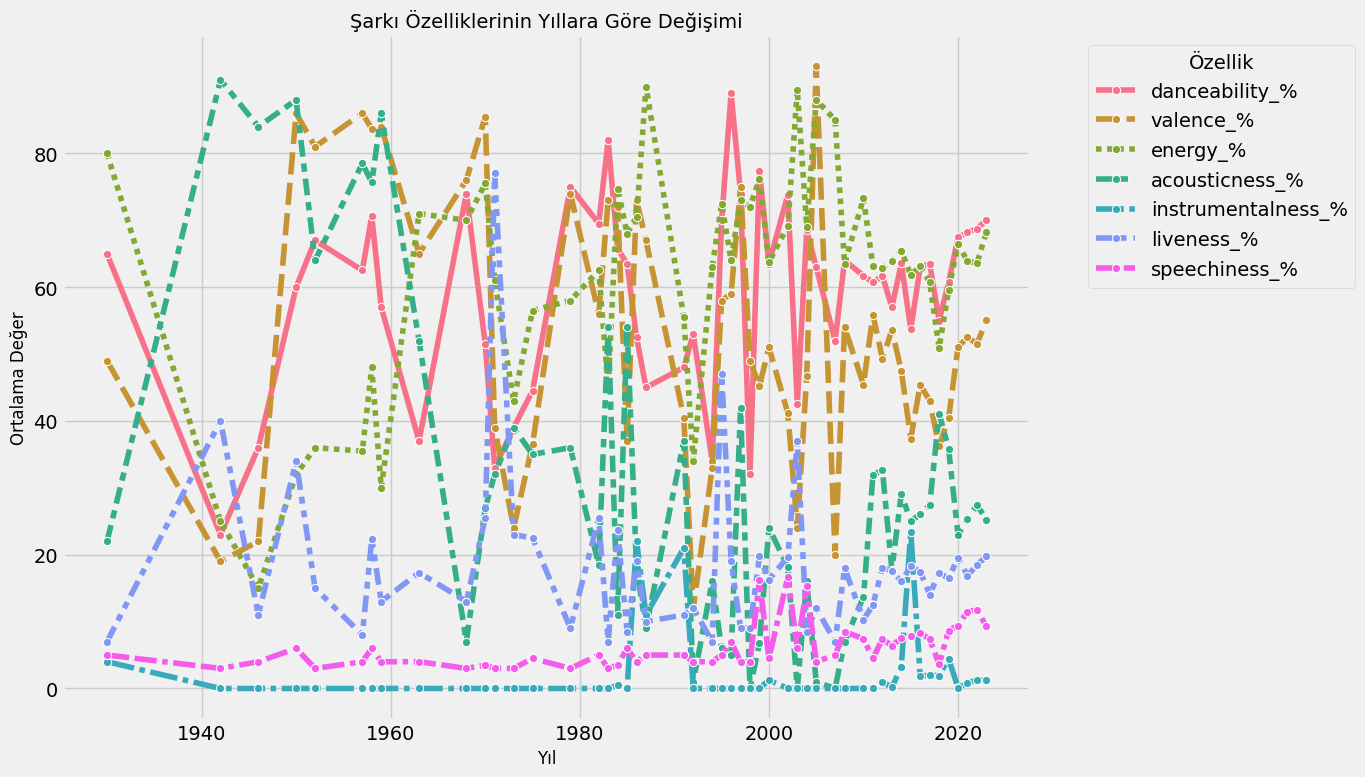

In [43]:
# Yıllara göre ortalama şarkı özelliklerini hesapla
yearly_features = df.groupby('released_year')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

# Şarkı özelliklerinin yıllara göre değişimini görselleştir
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_features, marker='o')
plt.title('Şarkı Özelliklerinin Yıllara Göre Değişimi', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Ortalama Değer', fontsize=12)
plt.legend(title='Özellik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Gerekli sütunları seç
song_features = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

# Eksik değerleri doldur (örneğin, ortalama değerlerle)
song_features = song_features.fillna(song_features.mean())

# Veriyi ölçeklendir
scaler = StandardScaler()
scaled_features = scaler.fit_transform(song_features)

# 2. Benzerlik Hesaplama
# Cosine Similarity matrisini oluştur
similarity_matrix = cosine_similarity(scaled_features)

# Cosine Similarity matrisini DataFrame'e dönüştür
similarity_df = pd.DataFrame(similarity_matrix, index=df['track_name'], columns=df['track_name'])

# 3. Öneri Üretme
def get_recommendations(song_name, num_recommendations=5):
    # Şarkının benzerlik skorlarını al
    similar_songs = similarity_df[song_name].sort_values(ascending=False)

In [45]:
df.sample()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,toplam_listelerde,key_,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
426,Limbo,Freddie Dredd,1,2022,8,11,688,0,199386237.0,14,1,17.0,0,2.0,75,80,46,62,3,6,11,46,719.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Gerekli sütunları seçelim (özellikler + popülerlik metrikleri)
features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 
    'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C#', 
    'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 
    'key_G#', 'mode_Major', 'mode_Minor', 'streams', 
    'toplam_listelerde'
]

# Veri setini hazırla
df_features = df[features].copy()

In [47]:
# StandardScaler ile ölçeklendirme yapalım (tüm sütunlar aynı ölçekte olsun)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [48]:
def hybrid_recommendation(song_name, num_recommendations=5):
    # 1. Seçilen şarkının benzerlik skorlarını al
    similar_scores = similarity_df[song_name]
    
    # 2. Popülerlik skorunu ekle (streams + toplam_listelerde)
    popularity_scores = df['streams'] * 0.6 + df['toplam_listelerde'] * 0.4
    
    # 3. Benzerlik ve popülerliği birleştir
    combined_scores = similar_scores * 0.7 + popularity_scores * 0.3
    
    # 4. En yüksek skorlu şarkıları seç (kendisi hariç)
    recommendations = combined_scores.sort_values(ascending=False).index[1:num_recommendations+1]
    
    return recommendations.tolist()

In [49]:
# Örnek: "Blinding Lights" şarkısı için öneri al
recommended_songs = hybrid_recommendation("Blinding Lights")
print("Önerilen Şarkılar:", recommended_songs)

Önerilen Şarkılar: [1, 2, 3, 4, 5]


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

df.set_index('track_name', inplace=True)


In [51]:
def hybrid_recommendation(song_name, num_recommendations=5):
    try:
        # Şarkının indeksini bul
        song_index = df.index.get_loc(song_name)
        
        # Cosine Similarity skorlarını al
        similar_scores = list(enumerate(similarity_matrix[song_index]))
        
        # Popülerlik skorunu ekle (streams ve liste sayıları)
        popularity = df['streams'] * 0.6 + df['toplam_listelerde'] * 0.4
        
        # Benzerlik ve popülerliği birleştir
        combined_scores = [
            (i, sim * 0.7 + popularity.iloc[i] * 0.3) 
            for i, sim in similar_scores
        ]
        
        # En yüksek skorlu şarkıları seç (kendisi hariç)
        combined_scores = sorted(combined_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
        
        # Şarkı isimlerini döndür
        return [df.index[i[0]] for i in combined_scores]
    
    except KeyError:
        return "Şarkı bulunamadı."


In [52]:
# Öneri al
recommended_songs = hybrid_recommendation("Blinding Lights")
print("Önerilen Şarkılar:", recommended_songs)

Önerilen Şarkılar: ['As It Was', 'good 4 u', 'drivers license', 'Dakiti', 'MONTERO (Call Me By Your Name)']


<Figure size 1000x600 with 0 Axes>

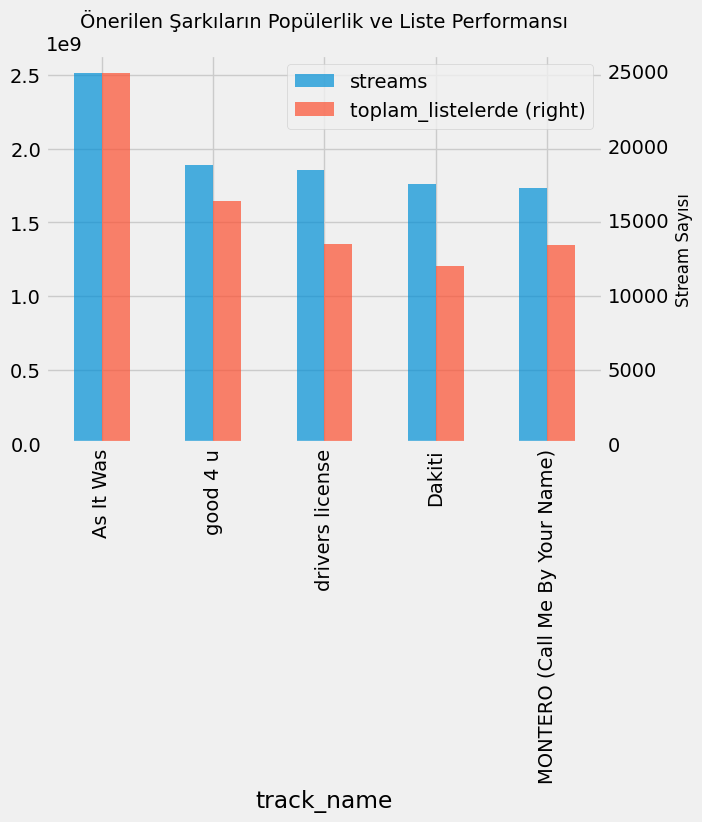

In [53]:
import matplotlib.pyplot as plt

# Önerilen şarkıların stream ve liste sayılarını al
recommended_data = df.loc[recommended_songs, ['streams', 'toplam_listelerde']]

# Çubuk grafik ile göster
plt.figure(figsize=(10, 6))
recommended_data.plot(kind='bar', secondary_y='toplam_listelerde', alpha=0.7)
plt.title('Önerilen Şarkıların Popülerlik ve Liste Performansı', fontsize=14)
plt.xlabel('Şarkı Adı', fontsize=12)
plt.ylabel('Stream Sayısı', fontsize=12)
plt.show()

In [54]:
df1 = pd.read_csv("spotify-2023.csv", encoding="latin-1")

# Özellikleri seç
features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 
    'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C#', 
    'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 
    'key_G#', 'mode_Major', 'mode_Minor'
]

# 'key' ve 'mode' sütunları için dummy değişkenler oluştur
df1 = pd.get_dummies(df1, columns=['key', 'mode'])

In [55]:
X = df1[features].copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [56]:
# Cosine Similarity matrisini oluştur
similarity_matrix = cosine_similarity(scaled_features)

# Benzerlik matrisini DataFrame'e dönüştür
similarity_df = pd.DataFrame(
    similarity_matrix, 
    index=df1['track_name'], 
    columns=df1['track_name']
)


In [57]:
def feature_based_recommendation(song_name, num_recommendations=5):
    try:
        # Şarkının benzerlik skorlarını al
        similar_scores = similarity_df[song_name].sort_values(ascending=False)
        
        # Kendisini çıkarma ve ilk N öneriyi al
        recommendations = similar_scores.drop(song_name).head(num_recommendations)
        
        return recommendations.index.tolist()
    
    except KeyError:
        return "Şarkı bulunamadı."

In [58]:
recommended_songs = feature_based_recommendation("Blinding Lights")
print("Önerilen Şarkılar:", recommended_songs)

Önerilen Şarkılar: ['STAY (with Justin Bieber)', 'Mr. Brightside', 'thought i was playing', 'Bound 2', "'Till I Collapse"]
